## HARSHINI P   917719C034  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Load dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Visualizations

Univariate Analysis

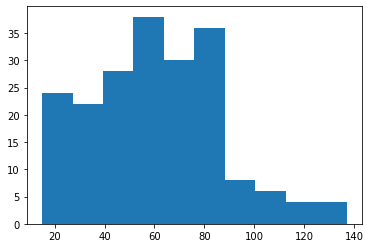

In [4]:
plt.hist(df['Annual Income (k$)'])
plt.show()

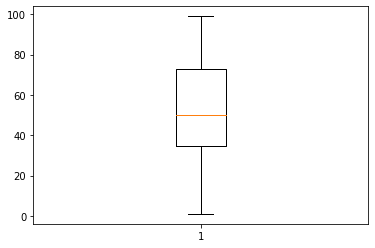

In [6]:
plt.boxplot(df['Spending Score (1-100)'])
plt.show()

Bivariate Analysis

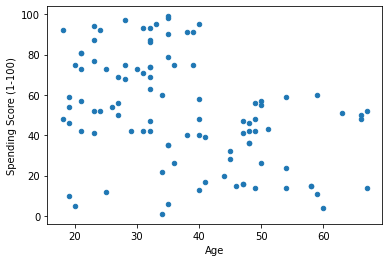

In [8]:
df.sample(100).plot.scatter(x='Age',y='Spending Score (1-100)')
plt.show()

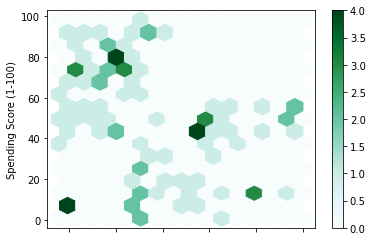

In [9]:
df.sample(100).plot.hexbin(x='Age',y='Spending Score (1-100)',gridsize=15)
plt.show()

Multivariate Analysis

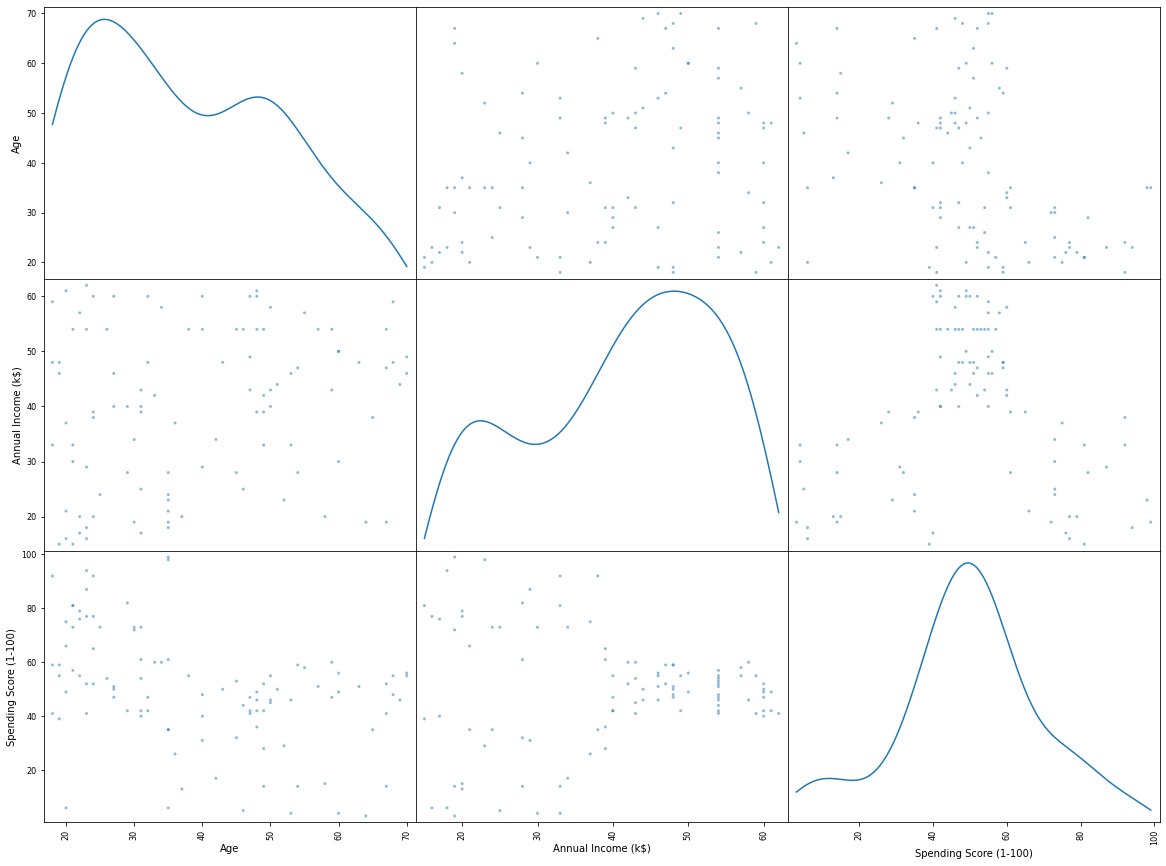

In [10]:
pd.plotting.scatter_matrix(df.loc[:100,'Age':'Spending Score (1-100)'], diagonal="kde", figsize=(20,15))
plt.show()

## 4. Describe

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 5. Handle missing values

In [12]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

No missing values are present in the dataset

## 6. Find outliers and replace them using IQR

C:\Users\HARSHINI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

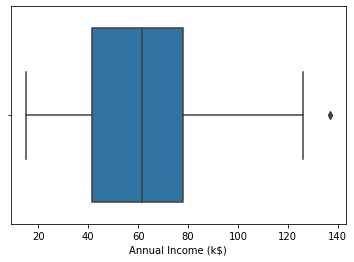

In [14]:
sns.boxplot(df['Annual Income (k$)'])

In [44]:
Q1 = df['Annual Income (k$)'].quantile(0.01)
Q3 = df['Annual Income (k$)'].quantile(0.99)

IQR = Q3 - Q1
upperLimit = Q3 + 1.5 * IQR
lowerLimit = Q1 - 1.5 * IQR

df = df[df['Annual Income (k$)'] < upperLimit]

C:\Users\HARSHINI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

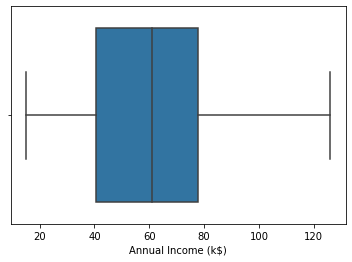

In [45]:
sns.boxplot(df['Annual Income (k$)'])

## 7. Check for Categorical columns and perform Encoding

In [46]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,0
2,3,0,20,16,6,1
3,4,0,23,16,77,0
4,5,0,31,17,40,1


Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,0
2,3,0,20,16,6,1
3,4,0,23,16,77,0
4,5,0,31,17,40,1


## 8. Independent and Dependent variables

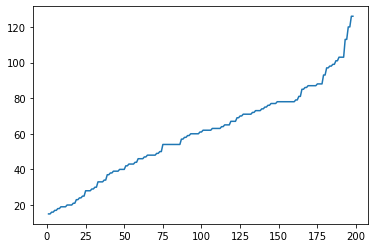

In [48]:
x = df['CustomerID']
y = df['Annual Income (k$)']

plt.plot(x, y)

In [51]:
x = df.iloc[:, [3, 4]].values

print(x.shape)

(198, 2)


## 9. Clustering

C:\Users\HARSHINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


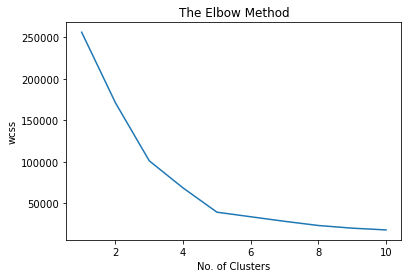

In [52]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

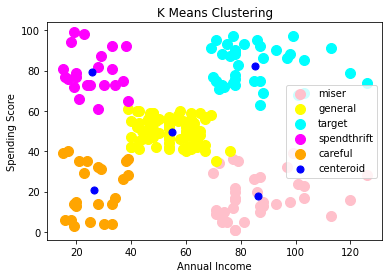

In [53]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## 11. Independent and dependent variables

In [54]:
df1=df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

## 12. Train test split
## 13. Build model

In [55]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## 14. Train model

In [56]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\Users\HARSHINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


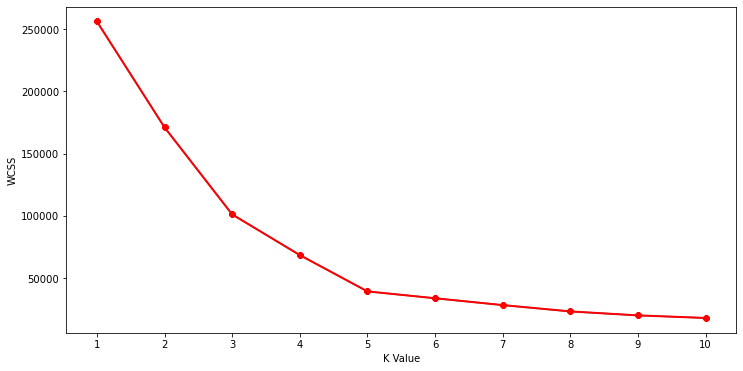

In [57]:
import numpy as np
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

## 15. Test model

In [58]:
km1=KMeans(n_clusters=5)
km1.fit(X)
y=km1.predict(X)
df1["label"] = y
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,2
1,2,1,21,15,81,4
2,3,0,20,16,6,2
3,4,0,23,16,77,4
4,5,0,31,17,40,2


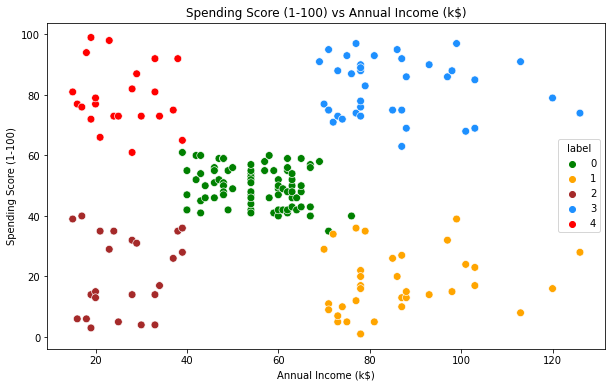

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

## 16. Evautaion metrics

C:\Users\HARSHINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


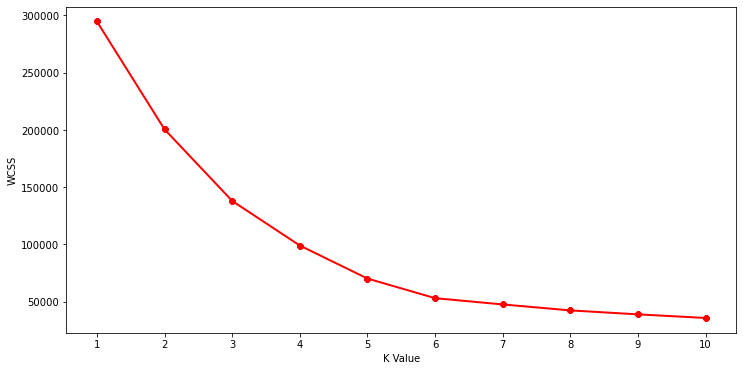

In [60]:
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [61]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 35
They are - [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197]
--------------------------------------------
Number of customer in 2nd group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
--------------------------------------------
Number of customer in 3rd group= 80
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 143]
--------------------------------------------
Number of customer in 4th group= 38
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190